# Part 1

### Q1) Create a function to add two 3x3 matrices. Each matrix is represented as a list of lists. The function takes two parameters and returns the computed matrix. Do not use numpy for computation.

In [14]:
def add_matrices(matrix_a, matrix_b):
    
    result = [
        [
            a + b
            for a, b in zip(a_row, b_row)
        ]
        for a_row, b_row in zip(matrix_a, matrix_b)
    ]
    
    return result



In [15]:
a_mat = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
b_mat = [[9, 8, 7], [6, 5, 4], [3, 2, 1]]

# Should only have 10s in the resulting matrix
result = add_matricies(a_mat, b_mat)
print(result)

[[10, 10, 10], [10, 10, 10], [10, 10, 10]]



### Q2) Now solve the above question using numpy 

In [18]:
import numpy as np
add_matrices_numpy = lambda matrix_a,matrix_b: np.array(matrix_a) + np.array(matrix_b)

In [20]:
#Sample output
X = [[12,7,3],
    [4 ,5,6],
    [7 ,8,9]]

Y = [[5,8,1],
    [6,7,3],
    [4,5,9]]

result1 = add_matrices(X,Y)
result2 = add_matrices_numpy(X,Y)

print('result1:')
for r in result1:
    print(r)
print('='*50)
print('result2:')
for r in result2:
    print(r)

result1:
[17, 15, 4]
[10, 12, 9]
[11, 13, 18]
result2:
[17 15  4]
[10 12  9]
[11 13 18]


### Q3)  Create a function to multiply two 3x3 matrices. Each matrix is represented as a list of lists. The function takes two parameters and returns the computed matrix. Do not use numpy for computation.

In [41]:
def multiply_matrixes(matrix_a, matrix_b):
    
    result = [
        [
            sum(
                a*b 
                for a,b in zip(a_row, b_col)
            ) 
            for b_col in zip(*matrix_b)
        ] 
        for a_row in matrix_a
    ]

    return result

In [42]:
a_mat = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
b_mat = [[9, 8, 7], [6, 5, 4], [3, 2, 1]]

result = multiply_matrixes(a_mat, b_mat)
for r in result:
    print(r)

[30, 24, 18]
[84, 69, 54]
[138, 114, 90]


### Q4) Now solve the above question using numpy

In [50]:
def multiply_matrices_numpy(matrix_a,matrix_b):
    
    return np.array(matrix_a) @ np.array(matrix_b)

In [51]:
#sample output
X = [[12,7,3],
    [4 ,5,6],
    [7 ,8,9]]

Y = [[5,8,1,2],
    [6,7,3,0],
    [4,5,9,1]]

result1 = multiply_matrixes(X,Y)
result2 = multiply_matrices_numpy(X,Y)

print('result1:')
for r in result1:
    print(r)
print('='*50)
print('result2:')
for r in result2:
    print(r)

result1:
[114, 160, 60, 27]
[74, 97, 73, 14]
[119, 157, 112, 23]
result2:
[114 160  60  27]
[74 97 73 14]
[119 157 112  23]


### Q5) Create a function to find transpose of a matrices. Matrix is represented as a list of lists. The function takes one parameters and returns the computed matrix. Do not use numpy for computation.

In [60]:
def transpose_matrix(matrix):
    
    num_rows, num_cols = len(matrix), len(matrix[0])
    matrix_T = [[0 for i in range(num_rows)] for j in range(num_cols)]
    
    for i in range(num_rows):
        for j in range(num_cols):
            
            matrix_T[j][i] = matrix[i][j]
        
    return matrix_T

In [61]:
a_mat = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
for r in transpose(a_mat):
    print(r)

[1, 4, 7]
[2, 5, 8]
[3, 6, 9]


### Q6) Now solve the above question using numpy

In [64]:
def transpose_matrix_numpy(matrix_a):
    return np.array(matrix_a).T

In [65]:
#sample output
X = [[12,7],
    [4 ,5],
    [3 ,8]]

result = transpose_matrix(X)

for r in result:
    print(r)

[12, 4, 3]
[7, 5, 8]


### Q7) Create a function to find inverse of a matrix. Matrix is represented as a list of lists. The function takes one parameters and returns the computed matrix. You can use numpy. 

In [66]:
def inverse_matrix(matrix_a):
    
    a, b, c, d = matrix_a[0][0], matrix_a[0][1], matrix_a[1][0], matrix_a[1][1]
    K = a*d - b*c
    
    result = [
        [d/K, -b/K], 
        [-c/K, a/K]
    ]
    
    return result

In [115]:
#sample output
X= [[3, 7],
    [2, 5]]

result = inverse_matrix(X)

for r in result:
    print(r)

[5.0, -7.0]
[-2.0, 3.0]



### (Bonus points) Try to find inverse of 3x3 matrix without using numpy

In [70]:
def exclude_rows_and_cols(matrix, row, col):
    
    num_rows, num_cols = len(matrix), len(matrix[0])
    
    small_mat = [
        [
            matrix[i][j] for j in range(num_cols) if j != col
        ]
        for i in range(num_rows) if i != row
    ]
    
    return small_mat

def determinant_2d(matrix):
    a, b, c, d = matrix[0][0], matrix[0][1], matrix[1][0], matrix[1][1]
    K = a*d - b*c
    
    return K

def determinant_3d(matrix):
    
    a, b, c = matrix[0][0], matrix[0][1], matrix[0][2]
    
    K1 = a * determinant_2d(exclude_rows_and_cols(matrix, 0, 0))
    K2 = b * determinant_2d(exclude_rows_and_cols(matrix, 0, 1))
    K3 = c * determinant_2d(exclude_rows_and_cols(matrix, 0, 2))
    
    K =  K1 - K2 + K3
    
    return K
    
def inverse_matrix_3x3(matrix):
    
    K = determinant_3d(matrix)
    inverse_mat = [
        [
            determinant_2d(exclude_rows_and_cols(matrix, row, col)) / K
            for col in range(3)
        ]
        
        for row in range(3)
    ]
    
    return inverse_mat

In [74]:
#sample output for bonus
X = [[1, 2, 3],
     [0, 1, 4],
     [5, 6, 0]]

result = inverse_matrix_3x3(X)

for r in result:
    print(r)

[-24.0, -20.0, -5.0]
[-18.0, -15.0, -4.0]
[5.0, 4.0, 1.0]


# Part 2

1. Import the necessary libraries. For this assignment, we'll need `numpy`, `matplotlib.pyplot`, and `pandas`. For some of the longer module names, remember we can alias them using `as` to make their types easier to work with.

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

2. Open and load the CSV file `Salary_Data.csv` into a Pandas dataframe. Name the dataframe variable something unique, like 'data' or 'df'. Remember that for CSV files, there's a built-in Pandas function for reading their data.

In [76]:
salary_data = pd.read_csv('./salary_data.csv')

3. Use the dataframe you created to print the first 5 items (the 'head') to the output. Utilize Pandas' built-in functions for this!

In [78]:
salary_data.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


4. Create a scatter plot using the Pandas dataframe. Make the X-axis years of experience, and the Y-axis the corresponding salary. Output the result. If you've done everything up to this point correctly, it should look like the following image:

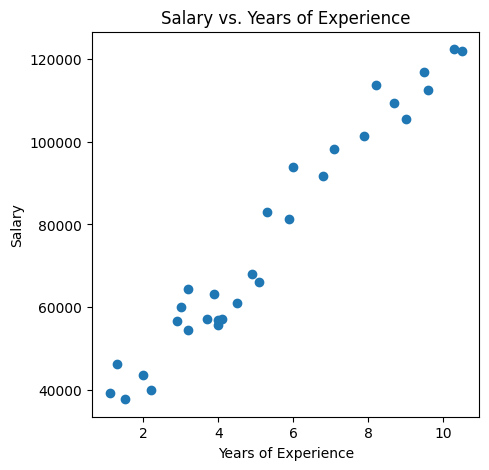

In [83]:
x, y = salary_data['YearsExperience'], salary_data['Salary']

fig, axs = plt.subplots(1,1, figsize=(5, 5))

axs.scatter(x, y)

axs.set_xlabel('Years of Experience')
axs.set_ylabel('Salary')
axs.set_title('Salary vs. Years of Experience')

plt.show()

5. Implement the Least Squares approximation, to find a straight line that best approximates the data we've been provided with and plotted in the previous question. We'll be implementing this system manually - you're **not** allowed to use an external library like `numpy.linalg` to solve. You will, however, want to use the `numpy` constructions for numbers and matrices we already imported to manipulate your data.

    > As a refresher, the Least Squares Approximation finds values $\theta_0, \theta_1$ such that $y = \theta_0 + \theta_1x$ is an accurate approximation of the trend of the data provided.
    > 
    > In matrix form:
    > $$A = [1 , X]$$
    > 
    > $A$ can be thought of as a column of $1$'s and a column of sample $x$ values. Then, we define $\theta$ as:
    > 
    > $$\theta = [\theta_0, \theta_1]^t$$
    > 
    > So $b = A \theta$
    > 
    > To find the approximate result, we can use the pseudo-inverse of A:
$$\theta = [(A^t A)^{(-1)} A^t] b$$

In [116]:
def normal_equation(x, y):
    
    A = np.column_stack((np.ones_like(x), x))
    theta = (np.linalg.inv(A.T @ A) @ A.T) @ y
    
    return theta

def linear(x, theta):
    
    A = np.column_stack((np.ones_like(x), x))
    return A @ theta
    

In [117]:
theta = normal_equation(x, y)
print(theta)

[25792.20019867  9449.96232146]


6. On top of the scatter plot you created in part **4**, we now want to use our calculated $\theta$ to draw our approximate linear regression onto the plot surface. Start with the plot from earlier, and then use the `matplotlib.pyplot.plot` function to plot the predicted line from an array of $x_{pred}$ and $y_{pred}$ predictions. You'll need to likely compute $A$ for each section of the line in order to compute $y=A \cdot \theta$ for a given point - think about how you can use Numpy and matrices to calculate all of the points in the line at once!
    If you've correctly set up your linear regression, as the end result you should see something that looks like this:

    ![](o2.png)

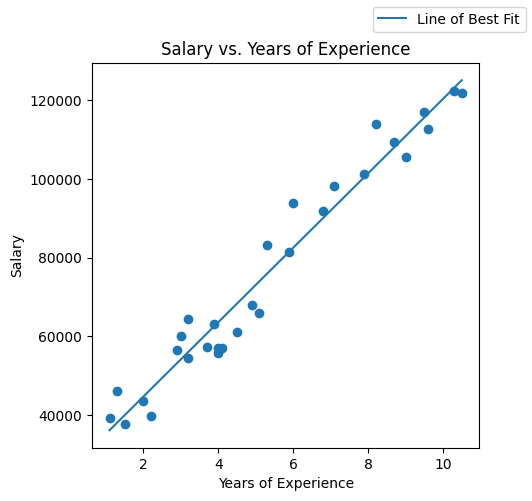

In [120]:
x, y = salary_data['YearsExperience'], salary_data['Salary']

fig, axs = plt.subplots(1,1, figsize=(5, 5))

axs.scatter(x, y)
axs.plot(x, linear(x, theta), label='Line of Best Fit')

axs.set_xlabel('Years of Experience')
axs.set_ylabel('Salary')
axs.set_title('Salary vs. Years of Experience')

fig.legend()

plt.show()